## 1차원 데이터

In [4]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:\hmkd1\m3_통계수학\data-20230409T235915Z-001\data/ch2_scores_em.csv',index_col = 'student number')
# df = pd.read_csv('./data/ch2_scores_em.csv',index_col = 'student number')

df.head()     # 이는 2차원 데이터

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = df.english[:10]    # 이 데이터는 시리즈
print(scores)

# 이를 배열로 바꾸면

scores = np.array(df.english)[:10] 
scores

student number
1     42
2     69
3     56
4     41
5     57
6     48
7     65
8     49
9     65
10    58
Name: english, dtype: int64


array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [6]:
scores_df = pd.DataFrame({'score':scores}, 
                        index = pd.Index(list('ABCDEFGHIJ'),name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [7]:
scores_df = pd.DataFrame(scores)
scores_df

# 시리즈로 데이터프레임을 만들거면 이렇게 바꾸고 인덱스를 변경해야 넌값이 안나옴

,0
0,42
1,69
2,56
3,41
4,57
5,48
6,65
7,49
8,65
9,58


In [8]:
scores_df = pd.DataFrame({'score':scores}, 
                        index = pd.Index(list('ABCDEFGHIJ'),name = 'student'))
scores_df    # 배열은 가능

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


<AxesSubplot:ylabel='Frequency'>

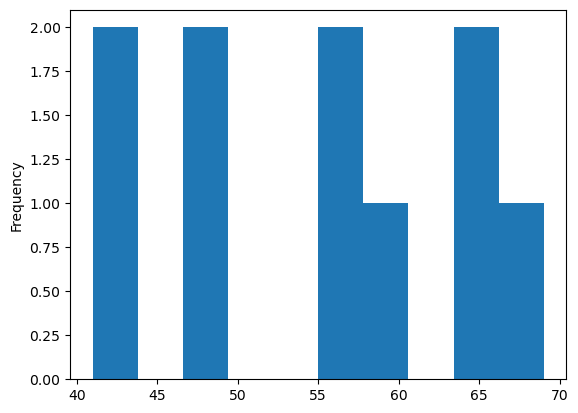

In [9]:
scores_df.score.plot(kind = 'hist')

In [10]:
# 평균값     - 배열 데이터 가지고

sum(scores)/len(scores)

55.0

In [11]:
np.mean(scores)

55.0

In [12]:
# 평균값   - 데이터 프레임 가지고
scores_df.mean()

score    55.0
dtype: float64

In [13]:
# 중앙값
print(np.median(scores))

scores_df.median()

56.5


score    56.5
dtype: float64

In [14]:
scores.sort()
print(scores)

# 여기서 중앙값은
(56+57)/2

[41 42 48 49 56 57 58 65 65 69]


56.5

In [15]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [16]:
n = len(sorted_scores)

if n % 2 == 0:                       # 짝수 일 때 중앙값 구하는 방법
    m0 = sorted_scores[n//2 - 1]     # 10 // 2   는 5 - 1  = 4
    m1 = sorted_scores[n//2]
    median = (m0+m1) / 2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [17]:
# 최빈값 
scores_df.mode()

,score
0,65


In [18]:
pd.Series(sorted_scores).mode()

0    65
dtype: int64

In [19]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Density'>

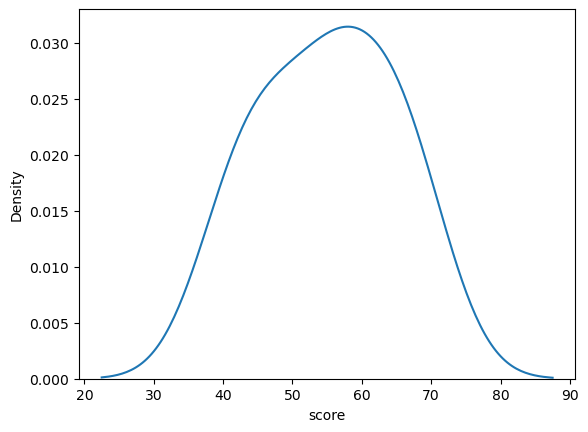

In [20]:
import seaborn as sns
sns.kdeplot(data=scores_df, x = 'score')       # 밀도함수

<AxesSubplot:xlabel='score', ylabel='Count'>

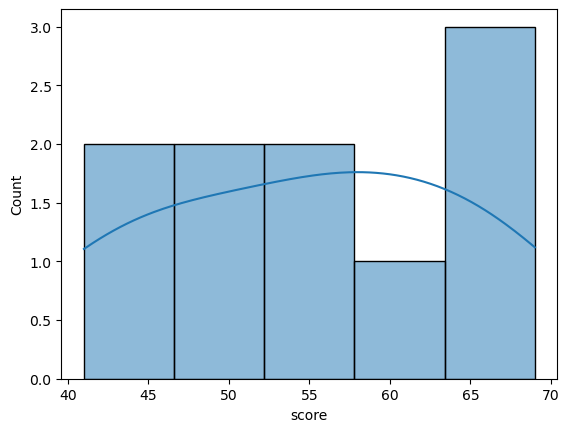

In [21]:
import seaborn as sns
sns.histplot(data=scores_df,x='score',kde=True)

<AxesSubplot:xlabel='score', ylabel='Count'>

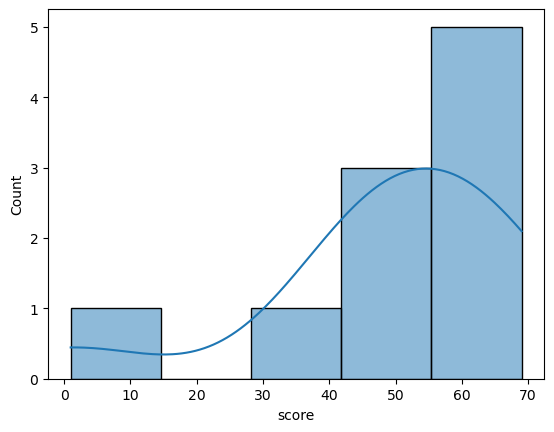

In [22]:
# 평균값이 < 중앙값
scores_df_a = scores_df.copy()
scores_df_a.iloc[9,0] = 1
sns.histplot(data=scores_df_a,x='score',kde=True)

In [23]:
scores_df.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Count'>

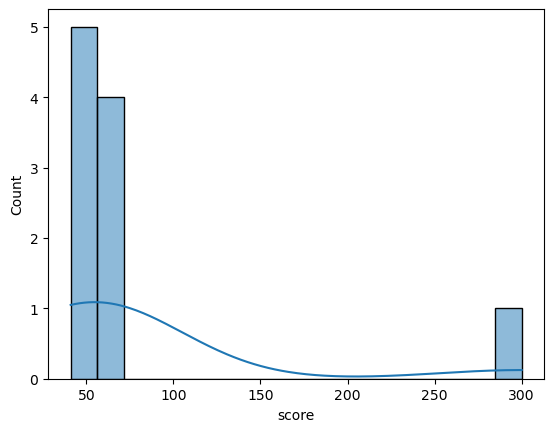

In [24]:
# 평균값 > 중앙값 왼쪽으로 치우쳐져 있음.
scores_df_b = scores_df.copy()
scores_df_b.iloc[9,0] = 300
sns.histplot(data=scores_df_b,x='score',kde=True)

In [25]:
scores_df.describe()


# 이상치 값은 큰 값이 들어가서 평균은 많이 차이 남.
# 중앙값은 동일

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [26]:
# 데이터의 산포도 지표
# 분산과 표준편차
# 편차 (deviation): 각 값에서 평균을 뺀 값. 다 합하면 0이 됨

mean = np.mean(scores)
print(mean)
print(scores)

deviation = scores - mean
print(deviation)

55.0
[41 42 48 49 56 57 58 65 65 69]
[-14. -13.  -7.  -6.   1.   2.   3.  10.  10.  14.]


In [27]:
sum(deviation)        # 편차 합은 항상 0. 그렇기 때문에 평균도 0
np.mean(deviation)


# 그래서 편차를 제곱해서 평균을 보여주는 것이 분산. 
# 근데 과대평가 되었기에 실제값으로 바꿔주기 위해서 루트를 씌어 표준편차로 바꿔줌

0.0

#### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산 기반, Pandas는 불편분산 기반으로 계산된다.
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
 
 [표본분산이 분산을 과소평가하는 이유]

- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mu)**2)/N  
호수안에 물고기가 7마리 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4,  
샘플링 3마리 {1,2,3} 표본평균 2  
이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [28]:
# 넘파이에서 구하는 표본분산

print(np.mean(deviation**2))
np.var(scores)

86.0


86.0

In [29]:
# 판다스에서는 불편분산이 나옴
scores_df.var()

score    95.555556
dtype: float64

In [30]:
# 넘파이에서 불편분산 (ddof = 0 표본분산 / ddof = 1 불편분산)
np.var(scores, ddof = 1 )

95.55555555555556

In [31]:
# 판다스에서 표본분산을 계산하는 방법
scores_df.var(ddof=0)

score    86.0
dtype: float64

In [32]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))
np.std(scores, ddof=0)

9.273618495495704

In [33]:
# 범위와 4분위수
# 범위
np.max(scores) - np.min(scores)

28

In [34]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR


15.0

In [35]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [36]:
# 데이터의 정규화
print(scores)
print(f'평균: {scores.mean()}, 표준편차: {scores.std().round(4)}')

[41 42 48 49 56 57 58 65 65 69]
평균: 55.0, 표준편차: 9.2736


In [37]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.50965882, -1.40182605, -0.75482941, -0.64699664,  0.10783277,
        0.21566555,  0.32349832,  1.07832773,  1.07832773,  1.50965882])

In [38]:
55.0 + z * scores.std()

array([41., 42., 48., 49., 56., 57., 58., 65., 65., 69.])

In [39]:
# 데이터의 시각화

english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [40]:
# 도수분포표

freq,_ = np.histogram(english_scores, bins = 10, range = (0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [41]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]        # 0에서 10까지 간격은 10으로
freq_dist_df = pd.DataFrame({'frequency':freq}, index = pd.Index(freq_class, name = 'class'))
freq_dist_df              # 도수분포표

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


<AxesSubplot:xlabel='frequency', ylabel='Count'>

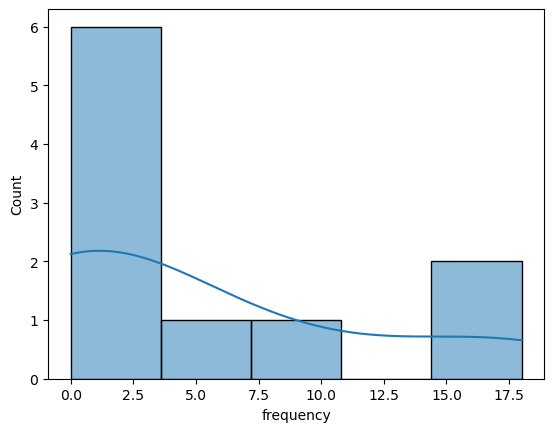

In [42]:
sns.histplot(data = freq_dist_df, x = 'frequency',kde =True)

In [43]:
# 계급값 :  각 계급을 대표하는 값으로 계급의 중앙값이 이용됨

class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [44]:
# 상대도수: 해당 계급 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [45]:
# 누적 상대도수 : 해당 계급까지의 상대도수의 합

cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq


array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [46]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value','frequency','relative_frequency','cumulative_frequency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [49]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(),'class_value']

65

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(english_scores,bins=10,range=(0,100))

In [ ]:
# 히스토그램 : 도수분포표를 막대그래프로 표현

import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
freq, _, _ = plt.hist(english_scores, bins = 10, range = (0,100))   
# english_scores 갖고 오면 3개의 값이 나오는데 빈도, bins 와 같은 옵션들 그 중에서 freq만 쓰고 싶어서 ,_ 를 쓰는 것

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100, 10+1))
plt.yticks(np.arange(0,freq.max()+1))


plt.show()


In [ ]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(english_scores,bins=25,range=(0,100))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0,100,25+1)) 
plt.yticks(np.arange(0,freq.max()+1))

#### 과제
클래스별 빈도를 나타내는 히스토그램에 추가하여 누적 상대도수(y축 왼쪽)를 꺽은선 그래프로 표현하세요

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)
print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

In [ ]:
# 과제(1): 클래스별 빈도를 나타내는 히스토그램에 누적상대도수(cumulative_freqency)를
# (y축 오른쪽에 누적상대도수, 왼쪽엔 그냥 값)추가하여 꺾은 선 그래프로 표현

plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(english_scores, bins=10, range=(0,100))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 100, 10+1))
plt.yticks(np.arange(0, freq.max()+1))

#######################################################


ax2=plt.twinx()    # twinx x는 동일하게 쓰겠다는 것. 그래서 y축 분리된 그래프 새로 만들기
x=np.linspace(0, 100, 10)           # 꺽은선은 히스토그램보다 하나 적음 10개!!
y=cum_rel_freq
ax2.plot(x,y, color='red', marker='o', markersize=4)

print(freq)                          # 30점부터 팍팍 늘고 80이후부터 0
print(y)                             # 여기에 맞춰서 누적되다가 freq가 0이 되니까 1로 동일
plt.show()

In [ ]:
# box plot

plt.figure(figsize = (5,6))
plt.boxplot(english_scores,labels = [['english']])

In [ ]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

#### 과제

타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개를 선택하여 각 컬럼의 특징을 설명하고 종속 변수인 survived와의 관계를 기술하세요.
- 각 컬럼에 대한 전처리 후 기초 통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 가장 잘 활용할 수 있는 형태로 변환

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:\hmkd1\m2_분석라이브러리\dataset/titanic3.csv',encoding='euc-kr')

          
# fare  범주화

def get_cat(fare):
    cat=''
    if fare <= 8: cat = '4'
    elif fare <= 15: cat = '3'
    elif fare <= 35: cat = '2'
    else : cat = '1'
    return cat

df['fare_cat'] = df.fare.apply(lambda x:get_cat(x))
df['fare_cat']

In [ ]:
sns.barplot(x='fare_cat',y='survived',hue='sex', data = df)

## 2차원 데이터


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('C:\hmkd1\m3_통계수학\data-20230409T235915Z-001\data/ch2_scores_em.csv',index_col = 'student number')
# df = pd.read_csv('./data/ch2_scores_em.csv',index_col = 'student number')

df.head()     # 이는 2차원 데이터

In [ ]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores,
                         'mathematics':ma_scores},
                        index = pd.Index(list('ABCDEFGHIJ'), name = 'student'))
scores_df

In [ ]:
# 편차

summary_df = scores_df.copy()
summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()

summary_df['mathematics_deviation'] = summary_df.mathematics - summary_df.mathematics.mean()
print(summary_df,'\n')

# 공분산 :  두 변수가 함께 변화하는 경향을 나타내는 통계적 척도 
# 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며,
# 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다.
# 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다. 


summary_df['product of deciation'] = summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df

In [ ]:
print(np.var(scores_df.english))
print(np.var(scores_df.mathematics))

In [ ]:
summary_df['product of deciation'].mean()

In [ ]:
print(np.cov(en_scores,ma_scores))       # ddof = 1
np.cov(en_scores,ma_scores,ddof = 0) 

# 공분산은 69.77777778

In [ ]:
# n-1로 나눔
np.cov(en_scores,ma_scores, ddof=1)     # default

# 공분산을 가지고 상관계수를 만들어줌
# 표준편차로 나눠주는데 
# 지금 이 데이터는 영어 * 수학이니까 표준편차도 영어*수학 표준편차로 나눠주기

In [ ]:
# 공분산은 방향을 알 수 있는데 숫자가지고만은 얼만큼 같은 방향으로 가는건지 다른 방향으로 가는건지 그 얼만큼을 모름
# 그래서 공분산을 가지고 상관계수를 구함

# 상관계수

np.cov(en_scores,ma_scores,ddof = 0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

In [ ]:
np.corrcoef(en_scores,ma_scores)

In [ ]:
scores_df.corr()

#### 과제 3
타이타닉 데이터셋에서 age, pclass, fare, sex, embarked 컬럼 중 2개의 쌍을 선택하여 공분산 행렬 및 상관계수 행렬을 각각 구하여 비교하세요.

상관계수는 연속형에서 보는 것이 조금 더 의미가 있음.<br> 
그래서 위 데이터셋에서는 연속형보다 범주형이기에 상관계수를 보는 것보다 빈도분석을 해야함
<br><br>
pclass는 범주형이지만 1,2,3 first 등 숫자가 의미를 가지고 있고<br>
fare 또한, 요금으로 숫자가 의미를 가지고 있기에 이 두 개의 상관계수는 볼 수 있음. 
<br><br>
나머지 칼럼에는 의미가 없고 빈도분석을 해야함

In [50]:
# 2차원 데이터의 시각화

import matplotlib.pyplot as plt

english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

<AxesSubplot:xlabel='english', ylabel='mathematics'>

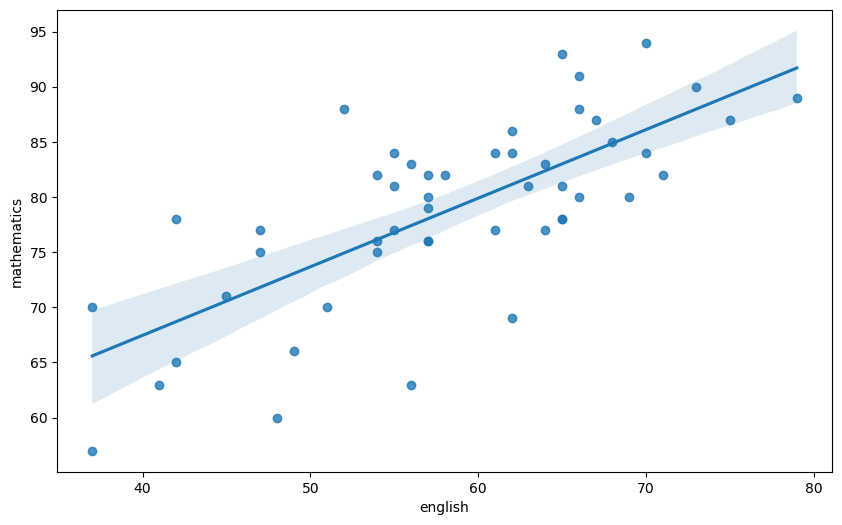

In [51]:
# 위 데이터를 가지고 회귀선 만들기

import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='english',y='mathematics')


# 직선을 결정하는 가중치, 즉, 계수와 절편을 알려줌. 이 식이 예측식이 되는 것. 
# 이 선과 점들 간의 거리 오차. 오차의 합이 최소가 되게끔하는 선을 찾는 것이 머신러닝

In [52]:
# 회귀직선의 방정식 구하기

poly_fit = np.polyfit(english_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)

eq = f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x'
eq

'42.60 + 0.62x'

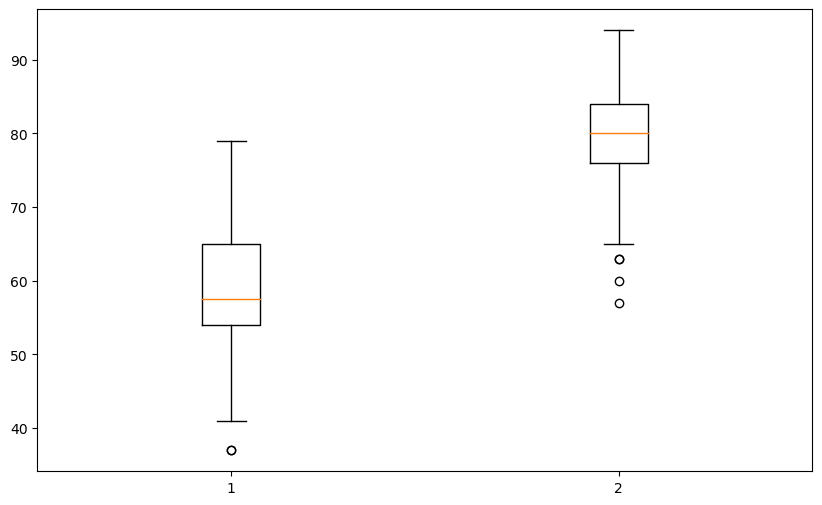

In [53]:
# sns.boxplot(data=df,x='english',y='mathematics')

plt.figure(figsize=(10,6))
plt.boxplot([english_scores,math_scores])
plt.show()

#### 과제1_0411
english와 mathematices 2차원 데이터 간의 관계를 파악할 수 있는 시각화를 수행하세요.

ex) 히스토그램(subplot 을 이용해서 두 개의 그림을 그리기)

In [54]:
df[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


<AxesSubplot:xlabel='student number'>

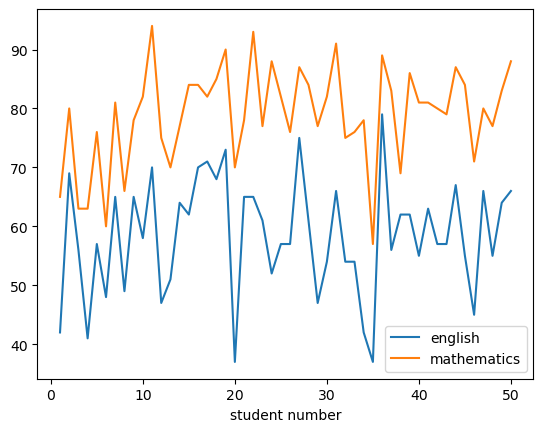

In [55]:
# 선그래프
df.plot()

# 수학의 점수가 더 높은 경향
# 수학과 영어 점수의 변화가 비슷함. 상승할 때 상승하고 하락할 때 하락하는

<AxesSubplot:xlabel='english', ylabel='mathematics'>

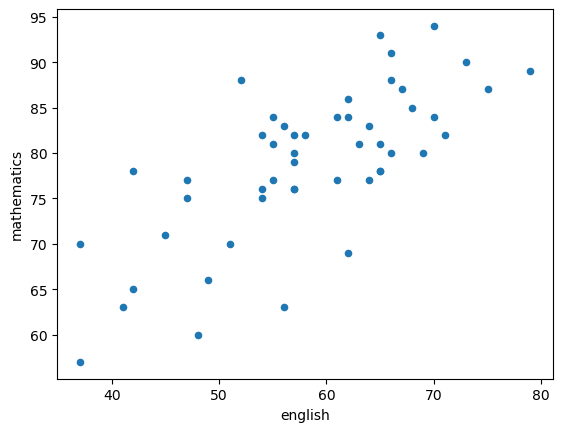

In [56]:
# 산점도 : 회귀선 유추
df.plot(x='english',y='mathematics',kind='scatter')

# 같이 높아진다.


<AxesSubplot:xlabel='english', ylabel='mathematics'>

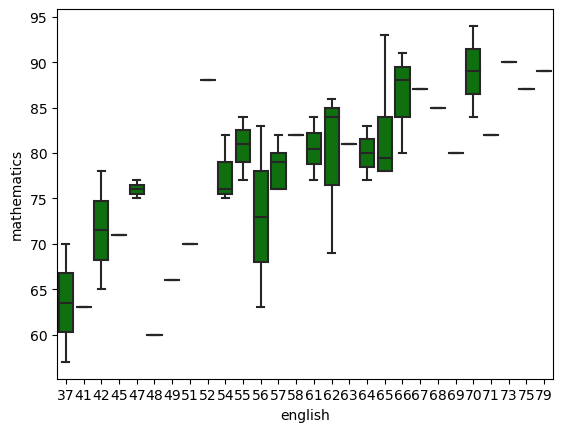

In [57]:
sns.boxplot(x='english',y='mathematics',data=df, color = 'g')

<AxesSubplot:xlabel='english', ylabel='mathematics'>

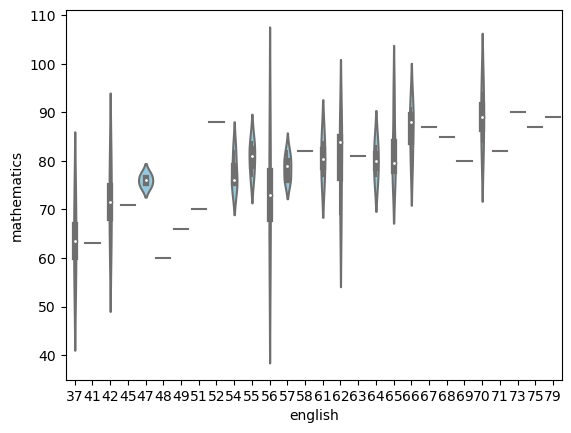

In [58]:
sns.violinplot(x='english',y='mathematics',data=df,color='skyblue')

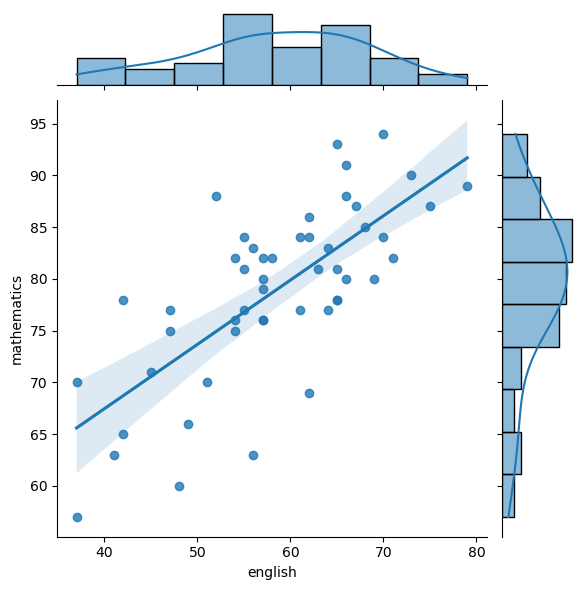

<AxesSubplot:xlabel='english', ylabel='mathematics'>

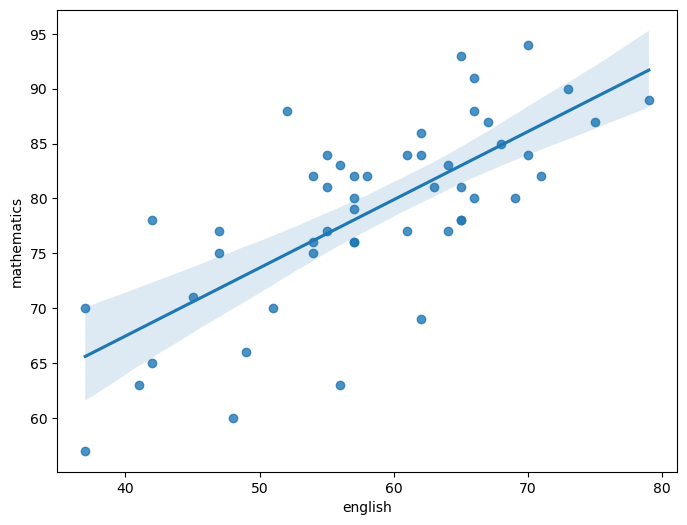

In [59]:
# jointplot

import seaborn as sns
import matplotlib.pyplot as plt
sns. jointplot(data=df, x = 'english', y = 'mathematics', kind = 'reg')
plt.show()

import seaborn as sns
plt.figure(figsize=(8,6))
sns.regplot(data=df,x='english',y='mathematics')

<AxesSubplot:>

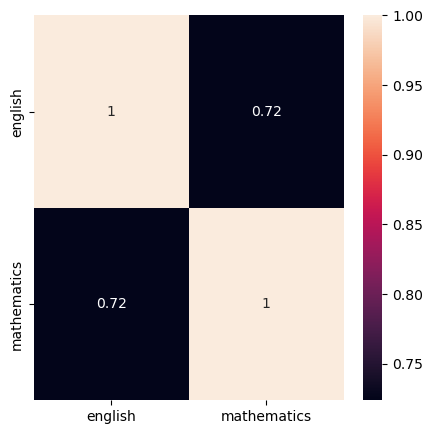

In [60]:
# 히트맵  : 상관관계를 보는

plt.figure(figsize = (5,5))
sns.heatmap(df[['english','mathematics']].corr(),annot = True)